In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split



# Dataset

El Student Exam Performance Dataset es un conjunto de datos diseñado para el análisis educativo y la aplicación de algoritmos de Machine Learning. Este dataset captura de manera integral los diversos factores académicos, personales, familiares y escolares que influyen en el rendimiento de los estudiantes. Al combinar variables clave como los hábitos de estudio, el porcentaje de asistencia, el nivel de motivación, el apoyo parental y el acceso a recursos, permite explorar a profundidad cómo el estilo de vida y el entorno impactan directamente en las calificaciones finales. Su estructura multidimensional lo convierte en una herramienta ideal para proyectos enfocados en la predicción del desempeño, el análisis de factores de éxito y la investigación educativa.

In [72]:
df = pd.read_csv('StudentPerformanceFactors.csv')

# EDA

In [73]:
print("Forma:", df.shape)
print("\nTipos y no nulos:")
display(df.info())
print("\nNulos totales:", df.isna().sum().sum())
print("Duplicados:", df.duplicated().sum())
print("\nPrimeras 5 filas:")
display(df.head())

Forma: (6607, 20)

Tipos y no nulos:
<class 'pandas.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   str  
 3   Access_to_Resources         6607 non-null   str  
 4   Extracurricular_Activities  6607 non-null   str  
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   str  
 8   Internet_Access             6607 non-null   str  
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   str  
 11  Teacher_Quality             6529 non-null   str  
 12  School_Type                 6607 non-null   str  
 13  Peer_Influence              6607 non-

None


Nulos totales: 235
Duplicados: 0

Primeras 5 filas:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [75]:
# Calcular cantidad y porcentaje de nulos por columna
null_summary = pd.DataFrame({
    'Nulos': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df)) * 100
})

# Filtrar solo columnas que tienen al menos un nulo
null_summary = null_summary[null_summary['Nulos'] > 0]

# Ordenar de mayor a menor cantidad de nulos
null_summary = null_summary.sort_values(by='Nulos', ascending=False)

# Mostrar resultado
print(null_summary)

                          Nulos  Porcentaje (%)
Parental_Education_Level     90        1.362192
Teacher_Quality              78        1.180566
Distance_from_Home           67        1.014076


In [74]:
print("Variables numéricas:")
display(df.describe().round(1))

print("\nVariables categóricas:")
display(df.describe(include='object'))

Variables numéricas:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.0,6607.0,6607.0,6607.0,6607.0,6607.0,6607.0
mean,20.0,80.0,7.0,75.1,1.5,3.0,67.2
std,6.0,11.5,1.5,14.4,1.2,1.0,3.9
min,1.0,60.0,4.0,50.0,0.0,0.0,55.0
25%,16.0,70.0,6.0,63.0,1.0,2.0,65.0
50%,20.0,80.0,7.0,75.0,1.0,3.0,67.0
75%,24.0,90.0,8.0,88.0,2.0,4.0,69.0
max,44.0,100.0,10.0,100.0,8.0,6.0,101.0



Variables categóricas:


/var/folders/0t/ssrzytjj7138g78t7p6vfp6r0000gn/T/ipykernel_52932/1982784103.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  display(df.describe(include='object'))


,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


El conjunto de datos analizado consta de 6,607 observaciones de estudiantes descritos a través de 20 atributos distintos. Estructuralmente, la información se divide en 7 variables numéricas (que cuantifican métricas como las horas de estudio, la asistencia y el puntaje del examen) y 13 variables categóricas (que definen el contexto socioeconómico y académico, tales como el nivel de ingresos familiares y el tipo de institución). La inspección inicial de calidad de datos confirma que el registro está libre de filas duplicadas. Sin embargo, se identificó un total de 235 valores nulos distribuidos de manera específica en las columnas de calidad del profesor (Teacher_Quality), nivel educativo de los padres (Parental_Education_Level) y distancia al hogar (Distance_from_Home), que aunque no son una gran cantidad tomando en cuenta el porcentaje aun asi es recomendable llenar los datos en el preprocessing

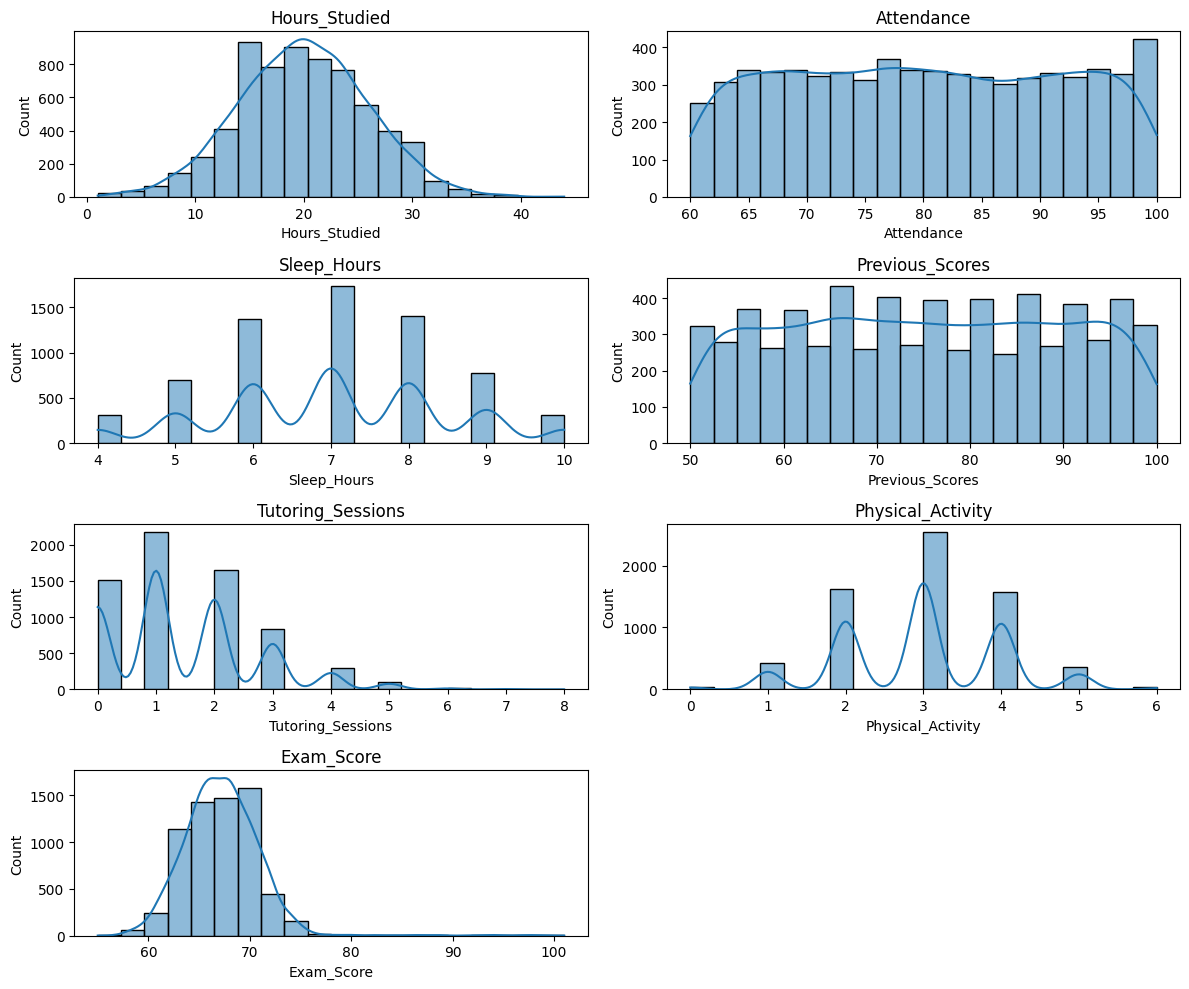

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
            'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

plt.figure(figsize=(12, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()



Hours_Studied tiene una forma de campana ligeramente sesgada a la izquierda: la mayoría de estudiantes estudia entre 15 y 25 horas por semana, con un pico claro alrededor de 20–22 horas y pocos casos extremos por encima de 35.

Attendance es bastante uniforme entre 60% y 100%, con una ligera concentración en valores altos (90–100%) y un mínimo notable en torno al 60–65%. Casi nadie tiene asistencia por debajo del 60%.

Sleep_Hours es multimodal con picos marcados en 6, 7 y 8 horas: la mayoría duerme entre 6 y 8 horas por noche, y hay menos estudiantes en los extremos (4–5 o 9–10 horas).

Previous_Scores muestra una distribución amplia y relativamente plana entre 50 y 100, con ligeros picos en 70–80 y sin sesgo fuerte hacia notas bajas o altas.

Tutoring_Sessions está muy sesgada a la derecha: la gran mayoría tiene 0, 1 o 2 sesiones de tutoría, y muy pocos superan las 4–5 sesiones.

Physical_Activity es discreta y multimodal: los valores más frecuentes son 2, 3 y 4 días/semana, con menos estudiantes en 0, 1, 5 o 6 días.

Exam_Score tiene una forma casi normal pero ligeramente sesgada a la izquierda: la mayoría de notas se concentra entre 65 y 75, con media alrededor de 67–68, cola larga hacia abajo (notas <60) y muy pocos casos por encima de 85–90.
En conjunto, las variables de esfuerzo (horas estudio, tutorías) y hábitos (sueño, actividad física) son bastante variables, pero las notas finales (Exam_Score) se concentran en un rango medio-alto, con menos estudiantes obteniendo notas muy bajas o muy altas.

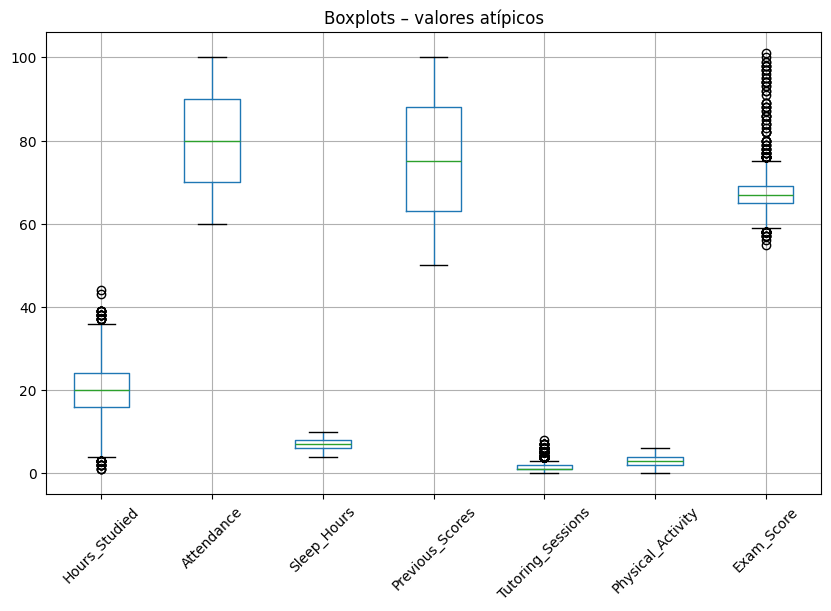

In [32]:
# Boxplots
plt.figure(figsize=(10, 6))
df[num_cols].boxplot(rot=45)
plt.title("Boxplots – valores atípicos")
plt.show()

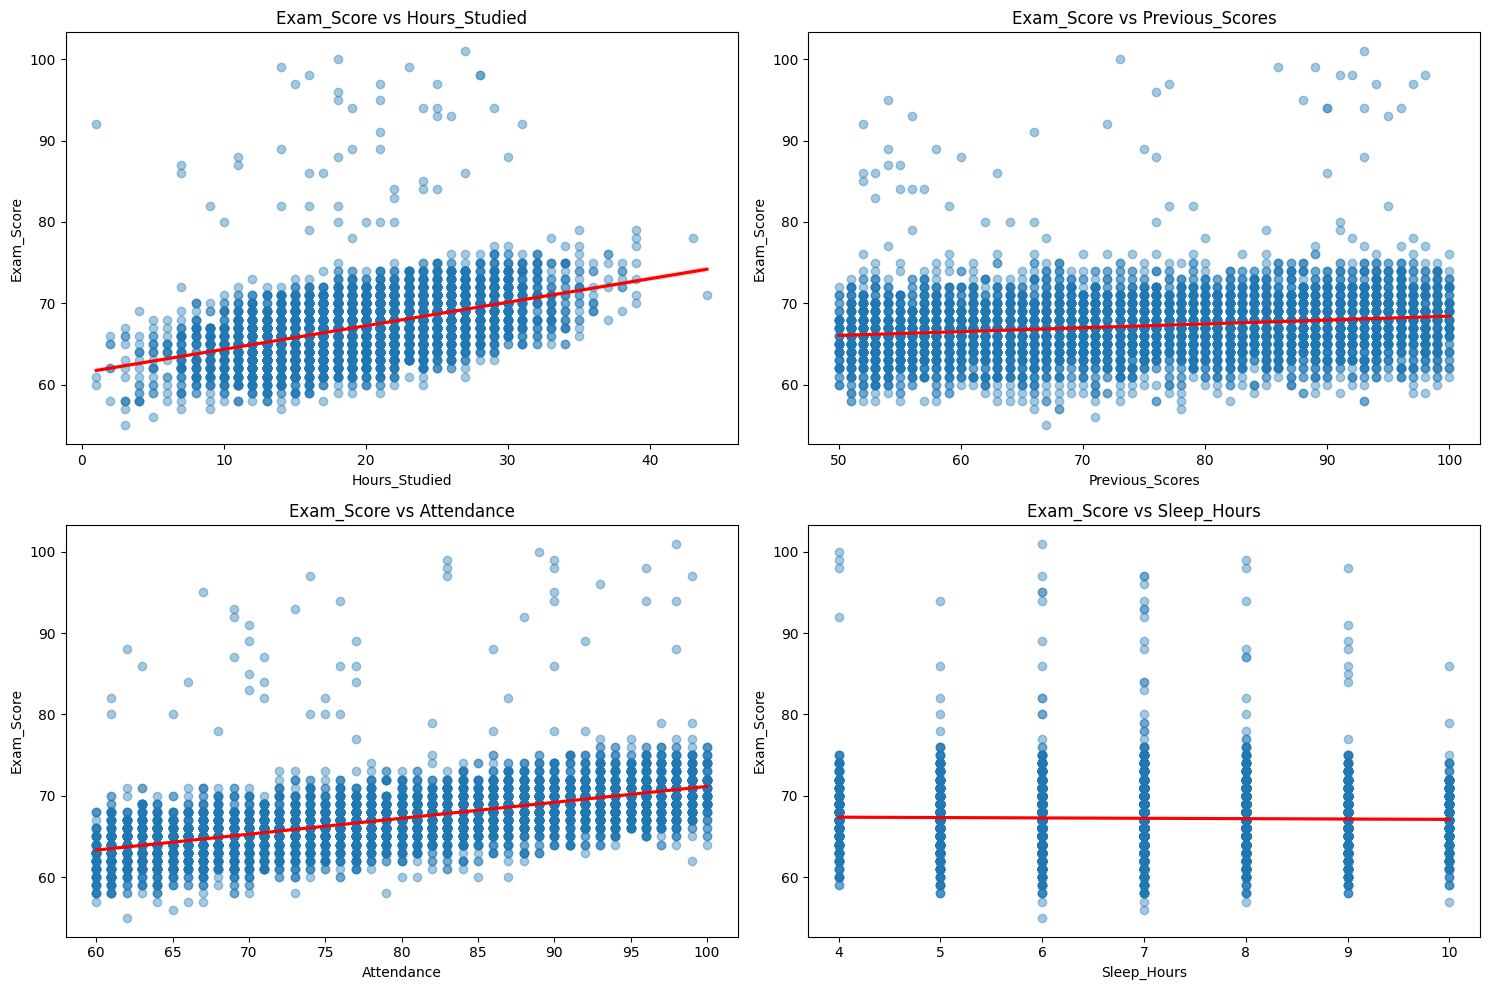

In [33]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Hours_Studied', 'Previous_Scores', 'Attendance', 'Sleep_Hours'], 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=col, y='Exam_Score', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.title(f'Exam_Score vs {col}')

plt.tight_layout()
plt.show()

Estas gráficas de dispersión con línea de regresión muestran las relaciones entre las variables principales y la nota final del examen (Exam_Score) en el EDA.
Exam_Score vs Hours_Studied indica una relación positiva moderada: a más horas de estudio, la nota tiende a subir (pendiente clara y positiva). Sin embargo, hay mucha dispersión; muchos estudiantes que estudian poco sacan notas decentes y viceversa.
Exam_Score vs Previous_Scores muestra la relación más fuerte y consistente: las notas previas predicen bastante bien la nota actual (línea ligeramente ascendente, pero con alta correlación visible en la nube de puntos). Es la variable que más explica el rendimiento final.
Exam_Score vs Attendance presenta una tendencia positiva débil: mayor asistencia se asocia con notas ligeramente más altas en promedio, aunque la diferencia es pequeña y la dispersión sigue siendo grande.
Exam_Score vs Sleep_Hours no muestra prácticamente ninguna relación: la línea es casi horizontal. Las horas de sueño no parecen influir de forma clara en las notas; los puntos están repartidos sin patrón evidente.
En resumen: las horas de estudio y especialmente las notas previas tienen el impacto más notable (positiva), la asistencia ayuda un poco, pero el sueño no parece importar. La variabilidad individual es alta en todas las relaciones.

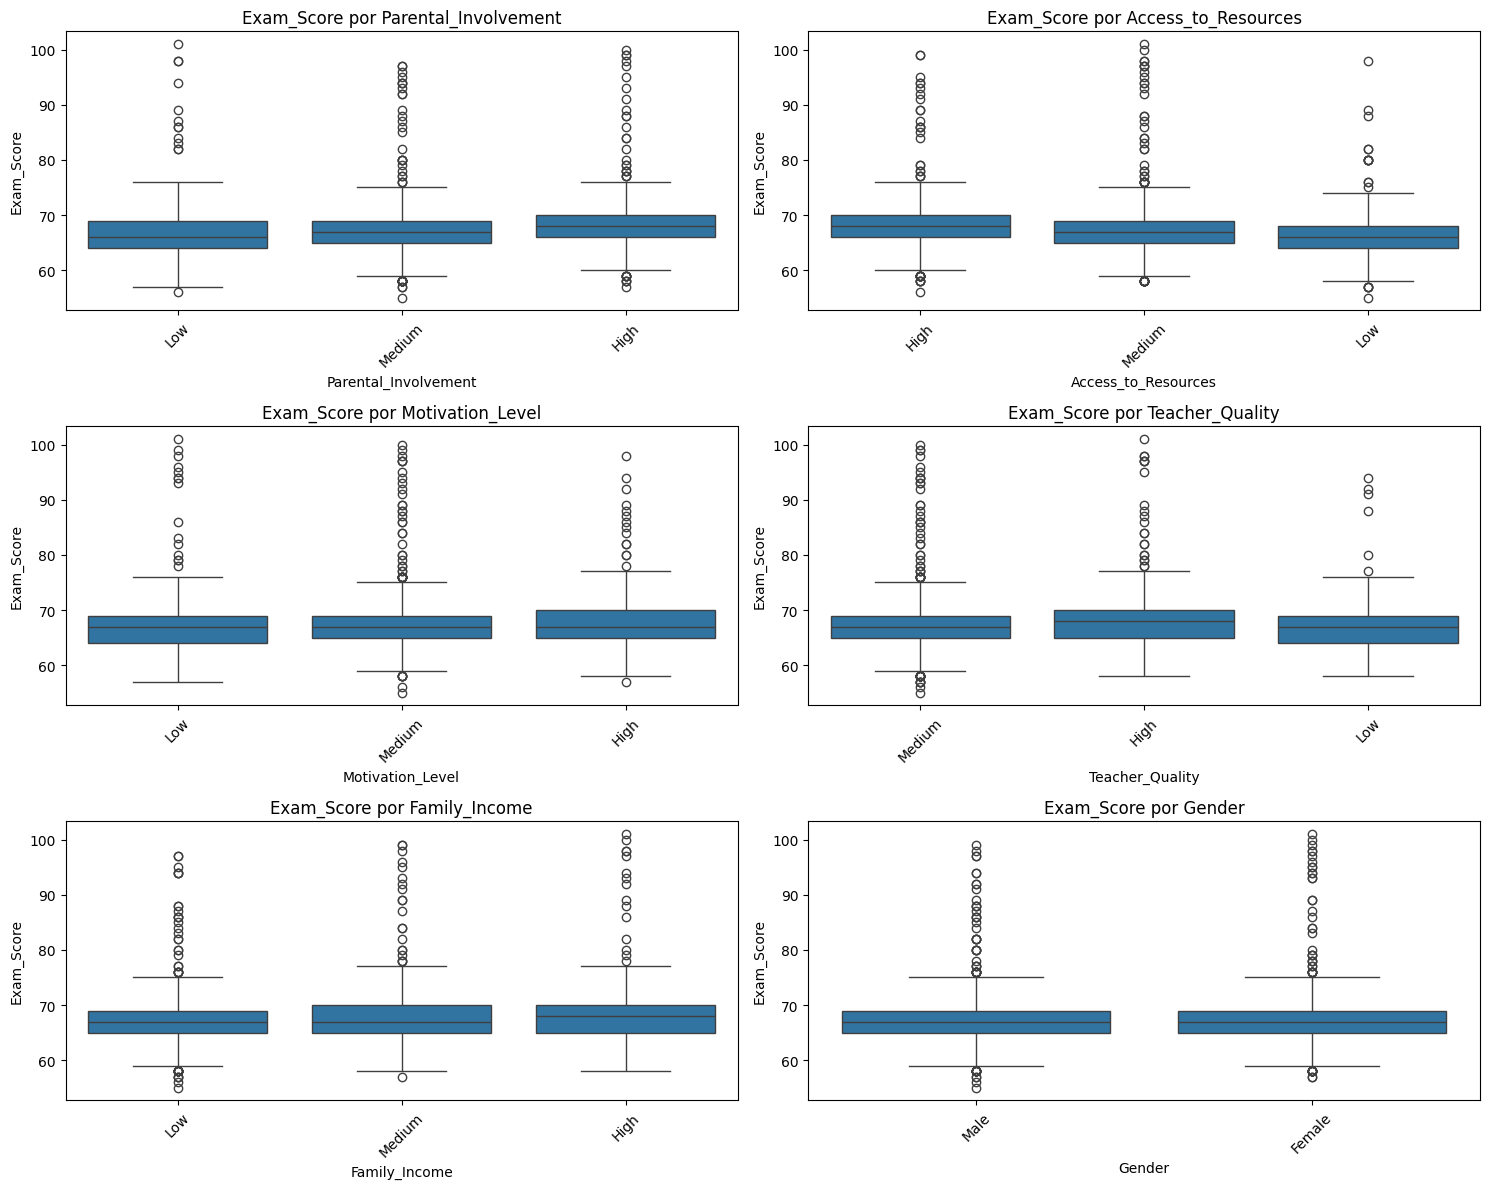

In [34]:
cat_cols_interes = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
                    'Teacher_Quality', 'Family_Income', 'Gender']

plt.figure(figsize=(15, 12))
for i, col in enumerate(cat_cols_interes, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=col, y='Exam_Score', data=df)
    plt.title(f'Exam_Score por {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

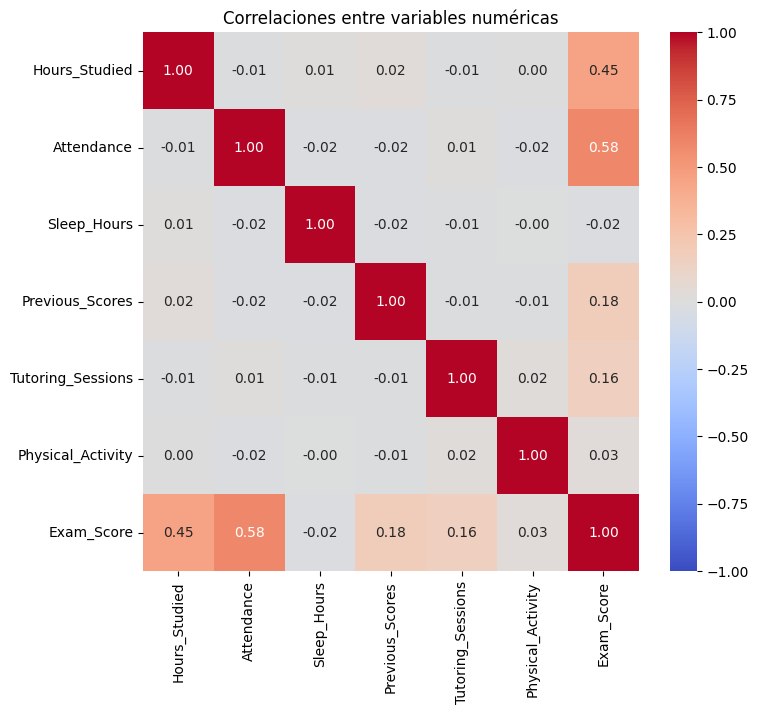

In [35]:
plt.figure(figsize=(8, 7))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlaciones entre variables numéricas")
plt.show()

La matriz de correlaciones revela que la asistencia (Attendance) es el factor con mayor relación positiva con la nota final del examen (Exam_Score), alcanzando 0.58, lo que indica que los estudiantes con mayor porcentaje de asistencia tienden a obtener mejores resultados. Le sigue las horas estudiadas (Hours_Studied) con una correlación de 0.45, mostrando que dedicar más tiempo al estudio también se asocia claramente con notas más altas. Las notas previas (Previous_Scores) presentan una correlación moderada de 0.18, mientras que las sesiones de tutoría (Tutoring_Sessions) aportan un aporte débil pero positivo de 0.16. En cambio, la actividad física (Physical_Activity) y las horas de sueño (Sleep_Hours) tienen correlaciones prácticamente nulas con la nota final (0.03 y -0.02 respectivamente), sugiriendo que estos hábitos no influyen de manera relevante en el rendimiento académico en este dataset. Entre las variables independientes no se observan correlaciones importantes entre sí, lo que descarta problemas graves de multicolinealidad. En resumen, la asistencia y el tiempo de estudio destacan como los predictores más relevantes del éxito en el examen.

# Prepro

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [37]:
# 1. Corrección de Exam_Score (máximo lógico = 100)
df['Exam_Score'] = df['Exam_Score'].clip(upper=100)

In [38]:
# 2. Definir listas de columnas por tipo
numeric_features = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours',
    'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity'
]

ordinal_features = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Teacher_Quality', 'Family_Income', 'Distance_from_Home'
]

onehot_features = [
    'Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities',
    'Gender', 'School_Type', 'Peer_Influence', 'Parental_Education_Level'
]

In [39]:
# 3. Crear transformers
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[
        ['Low', 'Medium', 'High'], ['Low', 'Medium', 'High'], ['Low', 'Medium', 'High'],
        ['Low', 'Medium', 'High'], ['Low', 'Medium', 'High'], ['Near', 'Moderate', 'Far']
    ]))
])

onehot_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [40]:
# 4. ColumnTransformer principal
preprocessor = ColumnTransformer(
    transformers=[
        ('num',   numeric_transformer, numeric_features),
        ('ord',   ordinal_transformer, ordinal_features),
        ('cat',   onehot_transformer,  onehot_features)
    ],
    remainder='passthrough'
)

In [41]:
# 5. División train-test
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [42]:
# 6. Aplicar todo el preprocesamiento
full_preprocess = Pipeline([('preprocessor', preprocessor)])

X_train_processed = full_preprocess.fit_transform(X_train)
X_test_processed  = full_preprocess.transform(X_test)

In [43]:
# Verificación final
print("Forma train procesado:", X_train_processed.shape)
print("Forma test procesado: ", X_test_processed.shape)
print("Tipo de datos procesado:", X_train_processed.dtype)

Forma train procesado: (5285, 21)
Forma test procesado:  (1322, 21)
Tipo de datos procesado: float64


# Training

Para el entrenamiento de los modelos se seleccionó RMSE (Root Mean Squared Error) como métrica principal de evaluación y comparación porque es la más adecuada para problemas de regresión continua como la predicción de la nota del examen (Exam_Score). RMSE penaliza de forma más severa los errores grandes, lo cual es relevante en este contexto ya que una predicción muy alejada del valor real tiene mayor impacto práctico que varios errores pequeños. Además, se expresa en la misma unidad que la variable objetivo (puntos de nota), facilitando su interpretación directa, y es una métrica estándar ampliamente utilizada en benchmarks académicos y competencias de machine learning para tareas de regresión.

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

scoring = 'neg_root_mean_squared_error'

models = {}

Se escogieron los modelos Ridge, RandomForestRegressor y GradientBoostingRegressor. Ridge se incluyó como modelo base interpretable y lineal, capaz de servir como referencia rápida y revelar si las relaciones entre las variables son principalmente lineales. RandomForest se seleccionó por su robustez, capacidad para capturar interacciones no lineales y bajo requerimiento de preprocesamiento, funcionando como un sólido baseline para patrones complejos. GradientBoosting se añadió por su alto potencial predictivo en datasets educativos, ya que corrige errores de forma secuencial y suele superar a RandomForest cuando existen patrones jerárquicos. Esta combinación permite comparar si un modelo simple basta o si se necesitan enfoques más complejos, cumpliendo con el requisito de al menos tres tipos distintos.

In [45]:
# 1. Random Forest
rf = RandomForestRegressor(random_state=42)
param_rf = {'n_estimators': [100, 200], 'max_depth': [8, 12, None], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(rf, param_rf, cv=5, scoring=scoring, n_jobs=-1)
grid_rf.fit(X_train_processed, y_train)
models['RandomForest'] = grid_rf

In [46]:
# 2. Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
param_gb = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
grid_gb = GridSearchCV(gb, param_gb, cv=5, scoring=scoring, n_jobs=-1)
grid_gb.fit(X_train_processed, y_train)
models['GradientBoosting'] = grid_gb

In [47]:
# 3. Ridge
ridge = Ridge(random_state=42)
param_ridge = {'alpha': [0.1, 1.0, 10.0, 50.0]}
grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, scoring=scoring, n_jobs=-1)
grid_ridge.fit(X_train_processed, y_train)
models['Ridge'] = grid_ridge

# Evaluacion

In [67]:
# Comparación
results = []
for name, grid in models.items():
    rmse_cv = -grid.best_score_
    results.append({'Modelo': name, 'Mejor RMSE (CV)': round(rmse_cv, 3), 'Mejores params': grid.best_params_})

df_results = pd.DataFrame(results)
print(df_results.sort_values('Mejor RMSE (CV)'))

             Modelo  Mejor RMSE (CV)  \
2             Ridge            2.049   
1  GradientBoosting            2.149   
0      RandomForest            2.367   

                                      Mejores params  
2                                    {'alpha': 10.0}  
1  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  
0  {'max_depth': None, 'min_samples_split': 5, 'n...  


In [69]:
# Mejor modelo y evaluación en test
best_model = models[df_results.sort_values('Mejor RMSE (CV)').iloc[0]['Modelo']].best_estimator_
y_pred = best_model.predict(X_test_processed)

print("\nEvaluación en TEST:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred):.3f}")
print(f"R²:   {r2_score(y_test, y_pred):.3f}")


Evaluación en TEST:
RMSE: 1.800
MAE:  0.445
R²:   0.771


La evaluación final del mejor modelo seleccionado (Ridge con RMSE de validación cruzada de 2.049) en el conjunto de prueba mostró un desempeño muy sólido, con RMSE de 1.800, MAE de 0.445 y R² de 0.771. Estos resultados indican que el modelo es capaz de predecir las notas del examen con un error promedio de apenas 1.8 puntos y explica aproximadamente el 77 % de la variabilidad en los datos. Aunque RandomForest y GradientBoosting también obtuvieron buenos resultados en validación cruzada (RMSE 2.367 y 2.149 respectivamente), la superioridad de Ridge sugiere que las relaciones entre las variables predictoras (especialmente Attendance, Hours_Studied y Previous_Scores) son predominantemente lineales y no requieren modelos más complejos para capturarlas. En conclusión, el pipeline de preprocesamiento y el modelo Ridge ofrecen una solución precisa, interpretable y eficiente para predecir el rendimiento académico en este dataset, con un nivel de error suficientemente bajo como para considerarse útil en contextos educativos reales.

# Serializacion

In [63]:
import joblib

In [64]:
full_pipeline_model = Pipeline([
    ('preprocessor', full_preprocess),
    ('model', best_model)
])
name = 'model.pkl'
joblib.dump(full_pipeline_model, name)
print("Pipeline + modelo guardado como", name)

Pipeline + modelo guardado como model.pkl
